<a href="https://colab.research.google.com/github/SarkarPriyanshu/Machine-Learning-Models/blob/main/ARIMA_ACF_AND_PACF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.2 MB/s eta 0:00:00


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import r2_score,mean_absolute_percentage_error,mean_squared_error

In [3]:
!wget -nc https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

--2023-05-09 12:20:04--  https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1598 (1.6K) [text/csv]
Saving to: ‘perrin-freres-monthly-champagne.csv’

perrin-freres-month 100%[===================>]   1.56K  --.-KB/s    in 0s      

2023-05-09 12:20:04 (26.0 MB/s) - ‘perrin-freres-monthly-champagne.csv’ saved [1598/1598]



In [4]:
df = pd.read_csv('/content/perrin-freres-monthly-champagne.csv',index_col='Month',parse_dates=True).rename(columns={"Perrin Freres monthly champagne sales millions ?64-?72": "sales"})

In [5]:
df.index.freq = 'MS'

<Axes: xlabel='Month'>

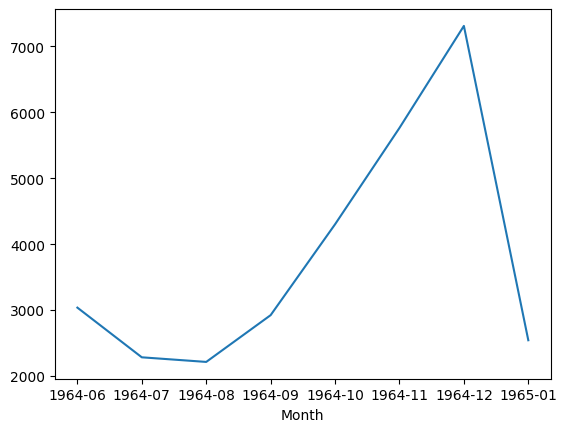

In [6]:
df['sales'].iloc[5:13].plot()

<Axes: xlabel='Month'>

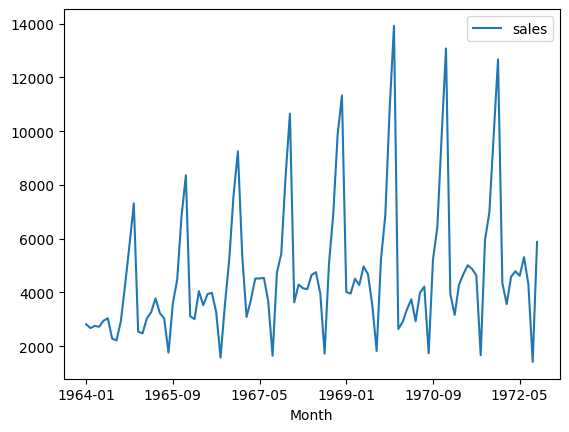

In [7]:
df.plot()

In [8]:
def adfuller_result(data,significance_lvl):
  result = adfuller(data.dropna())
  test_statistic,p_value = result[0],result[1]
  print(f'test_statistic: {test_statistic} \np_value : {p_value}')
  if p_value < significance_lvl:
    print('Stationary')
  else:
    print('Not Stationary')

In [9]:
adfuller_result(df['sales'],0.05)

test_statistic: -1.8335930563276215 
p_value : 0.36391577166024586
Not Stationary


In [10]:
adfuller_result(df['sales'].diff(),0.05)

test_statistic: -7.189896448050999 
p_value : 2.519620447387081e-10
Stationary


In [11]:
df['sales_diff'] = df['sales'].diff()

In [12]:
df.dropna(inplace=True)

<Axes: xlabel='Month'>

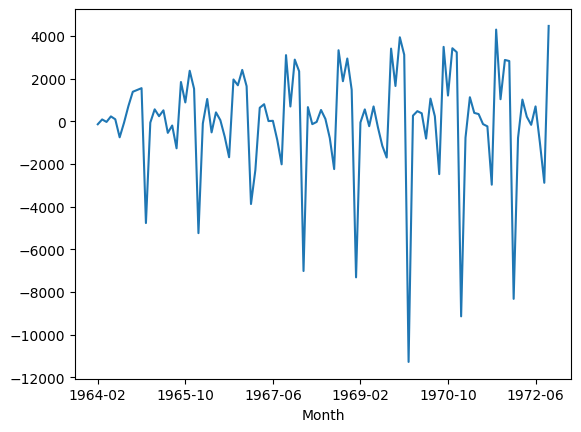

In [13]:
df['sales_diff'].plot()

In [14]:
train = df.iloc[:93,:1]
test = df.iloc[93:,:1]

In [15]:
model = auto_arima(train,seasonal=True, trace=True,
                   error_action='ignore',  # don't want to know if an order does not work
                   suppress_warnings=True,  # don't want convergence warnings
                   stepwise=False,m=8)  # set to stepwise

 ARIMA(0,1,0)(0,0,0)[8] intercept   : AIC=1709.661, Time=0.07 sec
 ARIMA(0,1,0)(0,0,1)[8] intercept   : AIC=1699.807, Time=0.07 sec
 ARIMA(0,1,0)(0,0,2)[8] intercept   : AIC=1704.100, Time=0.17 sec
 ARIMA(0,1,0)(1,0,0)[8] intercept   : AIC=1702.270, Time=0.06 sec
 ARIMA(0,1,0)(1,0,1)[8] intercept   : AIC=1701.463, Time=0.07 sec
 ARIMA(0,1,0)(1,0,2)[8] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(2,0,0)[8] intercept   : AIC=1687.443, Time=0.21 sec
 ARIMA(0,1,0)(2,0,1)[8] intercept   : AIC=1658.248, Time=0.27 sec
 ARIMA(0,1,0)(2,0,2)[8] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,1,1)(0,0,0)[8] intercept   : AIC=1710.529, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[8] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,1)(0,0,2)[8] intercept   : AIC=1690.724, Time=0.51 sec
 ARIMA(0,1,1)(1,0,0)[8] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,1)(1,0,1)[8] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,1,1)(1,0,2)[8] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,1)(2,0,0)[8] intercept   : AI

In [16]:
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   93
Model:             SARIMAX(2, 1, 0)x(2, 0, [1], 8)   Log Likelihood                -802.466
Date:                             Tue, 09 May 2023   AIC                           1618.932
Time:                                     12:20:55   BIC                           1636.584
Sample:                                 02-01-1964   HQIC                          1626.057
                                      - 10-01-1971                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     73.5902    302.529      0.243      0.808    -519.355     666.535
ar.L1         -0.2396      

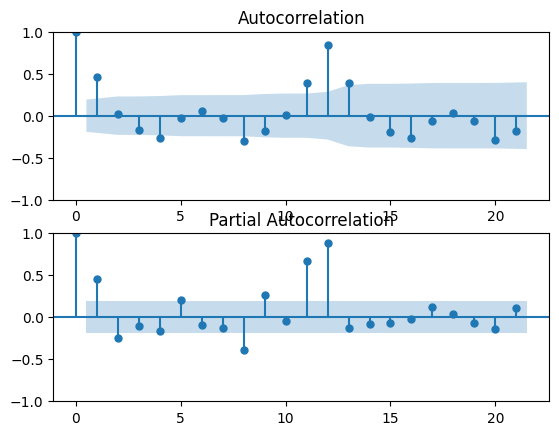

In [17]:
fig, ax = plt.subplots(2, 1)

plot_acf(df['sales'], ax=ax[0])
plot_pacf(df['sales'], ax=ax[1], method="ols")
plt.show()

In [18]:
model_params =  model.get_params()

In [19]:
test_pred,train_cont_int = model.predict(n_periods=test.shape[0],return_conf_int=True)

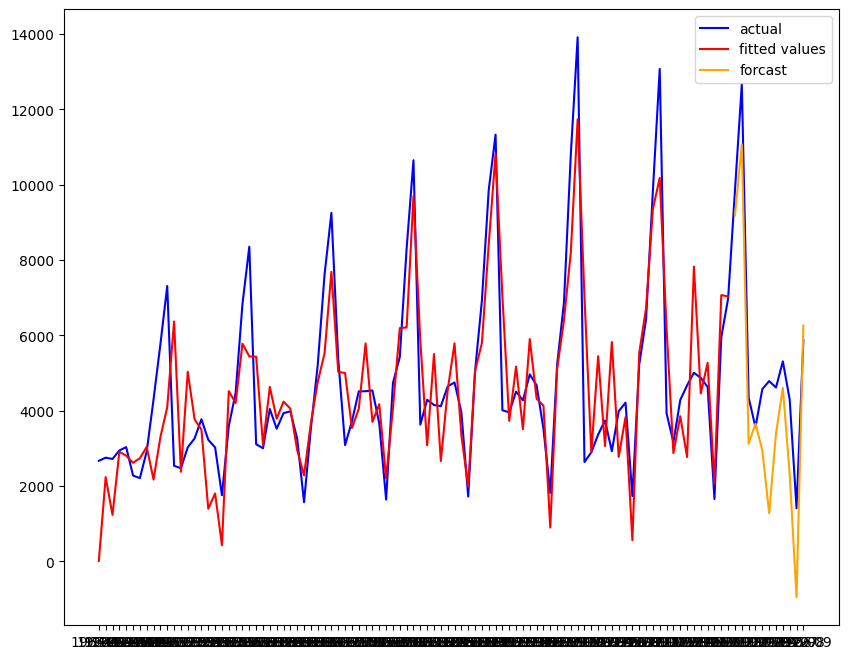

In [20]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(df.index,df['sales'],color='blue',label='actual')
ax.plot(train.index,model.fittedvalues(),color='red',label='fitted values')
ax.plot(test.index,test_pred,color='orange',label='forcast')
ax.plot
plt.legend()
plt.show()

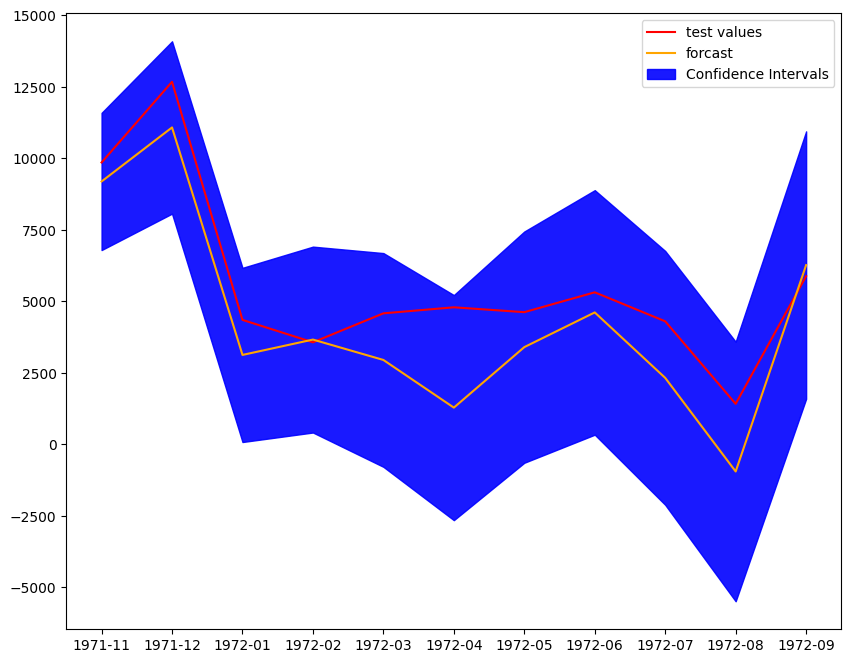

In [21]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(test.index,test['sales'],color='red',label='test values')
ax.plot(test.index,test_pred,color='orange',label='forcast')
ax.fill_between(test.index,
                     train_cont_int[:, 0], train_cont_int[:, 1],
                     alpha=0.9, color='BLUE',
                     label="Confidence Intervals")
plt.legend()
plt.show()

In [23]:
r2_score(test,test_pred)

0.6756105289925359

In [26]:
mean_absolute_percentage_error(test,test_pred),mean_squared_error(test,test_pred,squared=False)

(0.3805588014562069, 1680.9672397982504)